In [1]:
import time
import seaborn as sns

import Agents
import Instruments
import Markets
import Simulate
import Environment
import SimPlotting

import numpy as np
from scipy.stats import norm, uniform
import random

import matplotlib.pyplot as plt

In [2]:
def initialize_instruments(Nins_1, Nins_2, prods, stds):

    instruments = []

    #means = mean_productivities
    #stds = std_productivities

    for N in range(Nins_1):
        instrument = Instruments.Universal([prods[0], 0])
        instruments.append(instrument)

    for N in range(Nins_2):
        instrument = Instruments.Universal([0, prods[1]])
        instruments.append(instrument)
        
    return instruments

def _initialize_instruments(Ninstruments, means, stds):
    '''
    Assumes Normal. Initializes Universal Instruments.
    
    Make more general to incude different distributions'''

    instruments = []

    #means = mean_productivities
    #stds = std_productivities

    for N in range(Ninstruments):
        prod_vec = [norm.rvs(loc=mean, scale=std) for mean, std in zip(means, stds)]
        instrument = Instruments.Universal(prod_vec)
        instruments.append(instrument)
        
    return instruments

In [3]:
def initialize_agents(initial_parameters, learning_parameters) -> list:
    
    kwargs = {**initial_parameters, **learning_parameters}
    
    
    Agent_list = [Agents.Agent(**kwargs) for i in range(Nagents)]

    return Agent_list

In [4]:
def initialize_allocation(agent_list, instrument_list):
    
    for agent in agent_list:
        
        random_instrument = random.choice(instrument_list)
        instrument_list.remove(random_instrument)
        
        agent.Ins = random_instrument

Initialize Parameters

In [5]:
Nagents = 10
dt = 1
cg = np.array([1.0])#, 1.0])
Nproducts = cg.shape[0]

mean_productivities = [5]#, 5]
std_productivities  = [0]#, 0]

Ninstruments = Nagents
Nactions = 3 + Nproducts

In [6]:
2./5.

0.4

In [7]:
initial_parameters = {
    'D': np.zeros(Nproducts), #np.ones(Nproducts)*2,
    'cg': cg,
    'M': 10.,
    'n_actions': Nactions
}

learning_parameters = {
    'gamma': 0.5,
    #'gamma': 0.5,
    #'gamma': 0.1,
    'epsilon': 1.0,
    'eps_end': 0.01,
    'eps_dec': 0.01,
    'batch_size': 64,
    'input_dims': [3*Nproducts+1],
    #'lr':0.001,
    'lr': 0.005,
    'n_actions':Nactions,
}

Initialize Agents, Instruments, and Distribution Institution

In [8]:
# Agents
agent_list = initialize_agents(initial_parameters, learning_parameters)
for agent in agent_list:
    agent.Q = np.random.random(Nproducts)*10
    agent.Q0 = np.copy(agent.Q)
    
# Instruments
ratio = 0.5
K1 = int(ratio*Ninstruments)
#instrument_list = initialize_instruments(K1, Ninstruments - K1, mean_productivities, std_productivities)
instrument_list = _initialize_instruments(Ninstruments, mean_productivities, std_productivities)

# Distribution
productbank = Markets.ProductBank(Nproducts, alpha=0.75)

# Initialize Allocaiton
initialize_allocation(agent_list, instrument_list)

# Initialize environment and simulation
env = Environment.Environment(dt, agent_list, instrument_list, productbank)
sim = Simulate.Simulate(env)

Run Simulation

In [9]:
Ntimes = 300

s = time.perf_counter()
sim.run_simulation(Ntimes)
e = time.perf_counter()

print(e-s)
print((e-s)/60.)
print((e-s)/60./60.)

15.915082299994538
0.26525137166657564
0.004420856194442927


Plot

In [10]:
splt = SimPlotting.SimPlotting(sim)
plt.rcParams['figure.dpi'] = 500

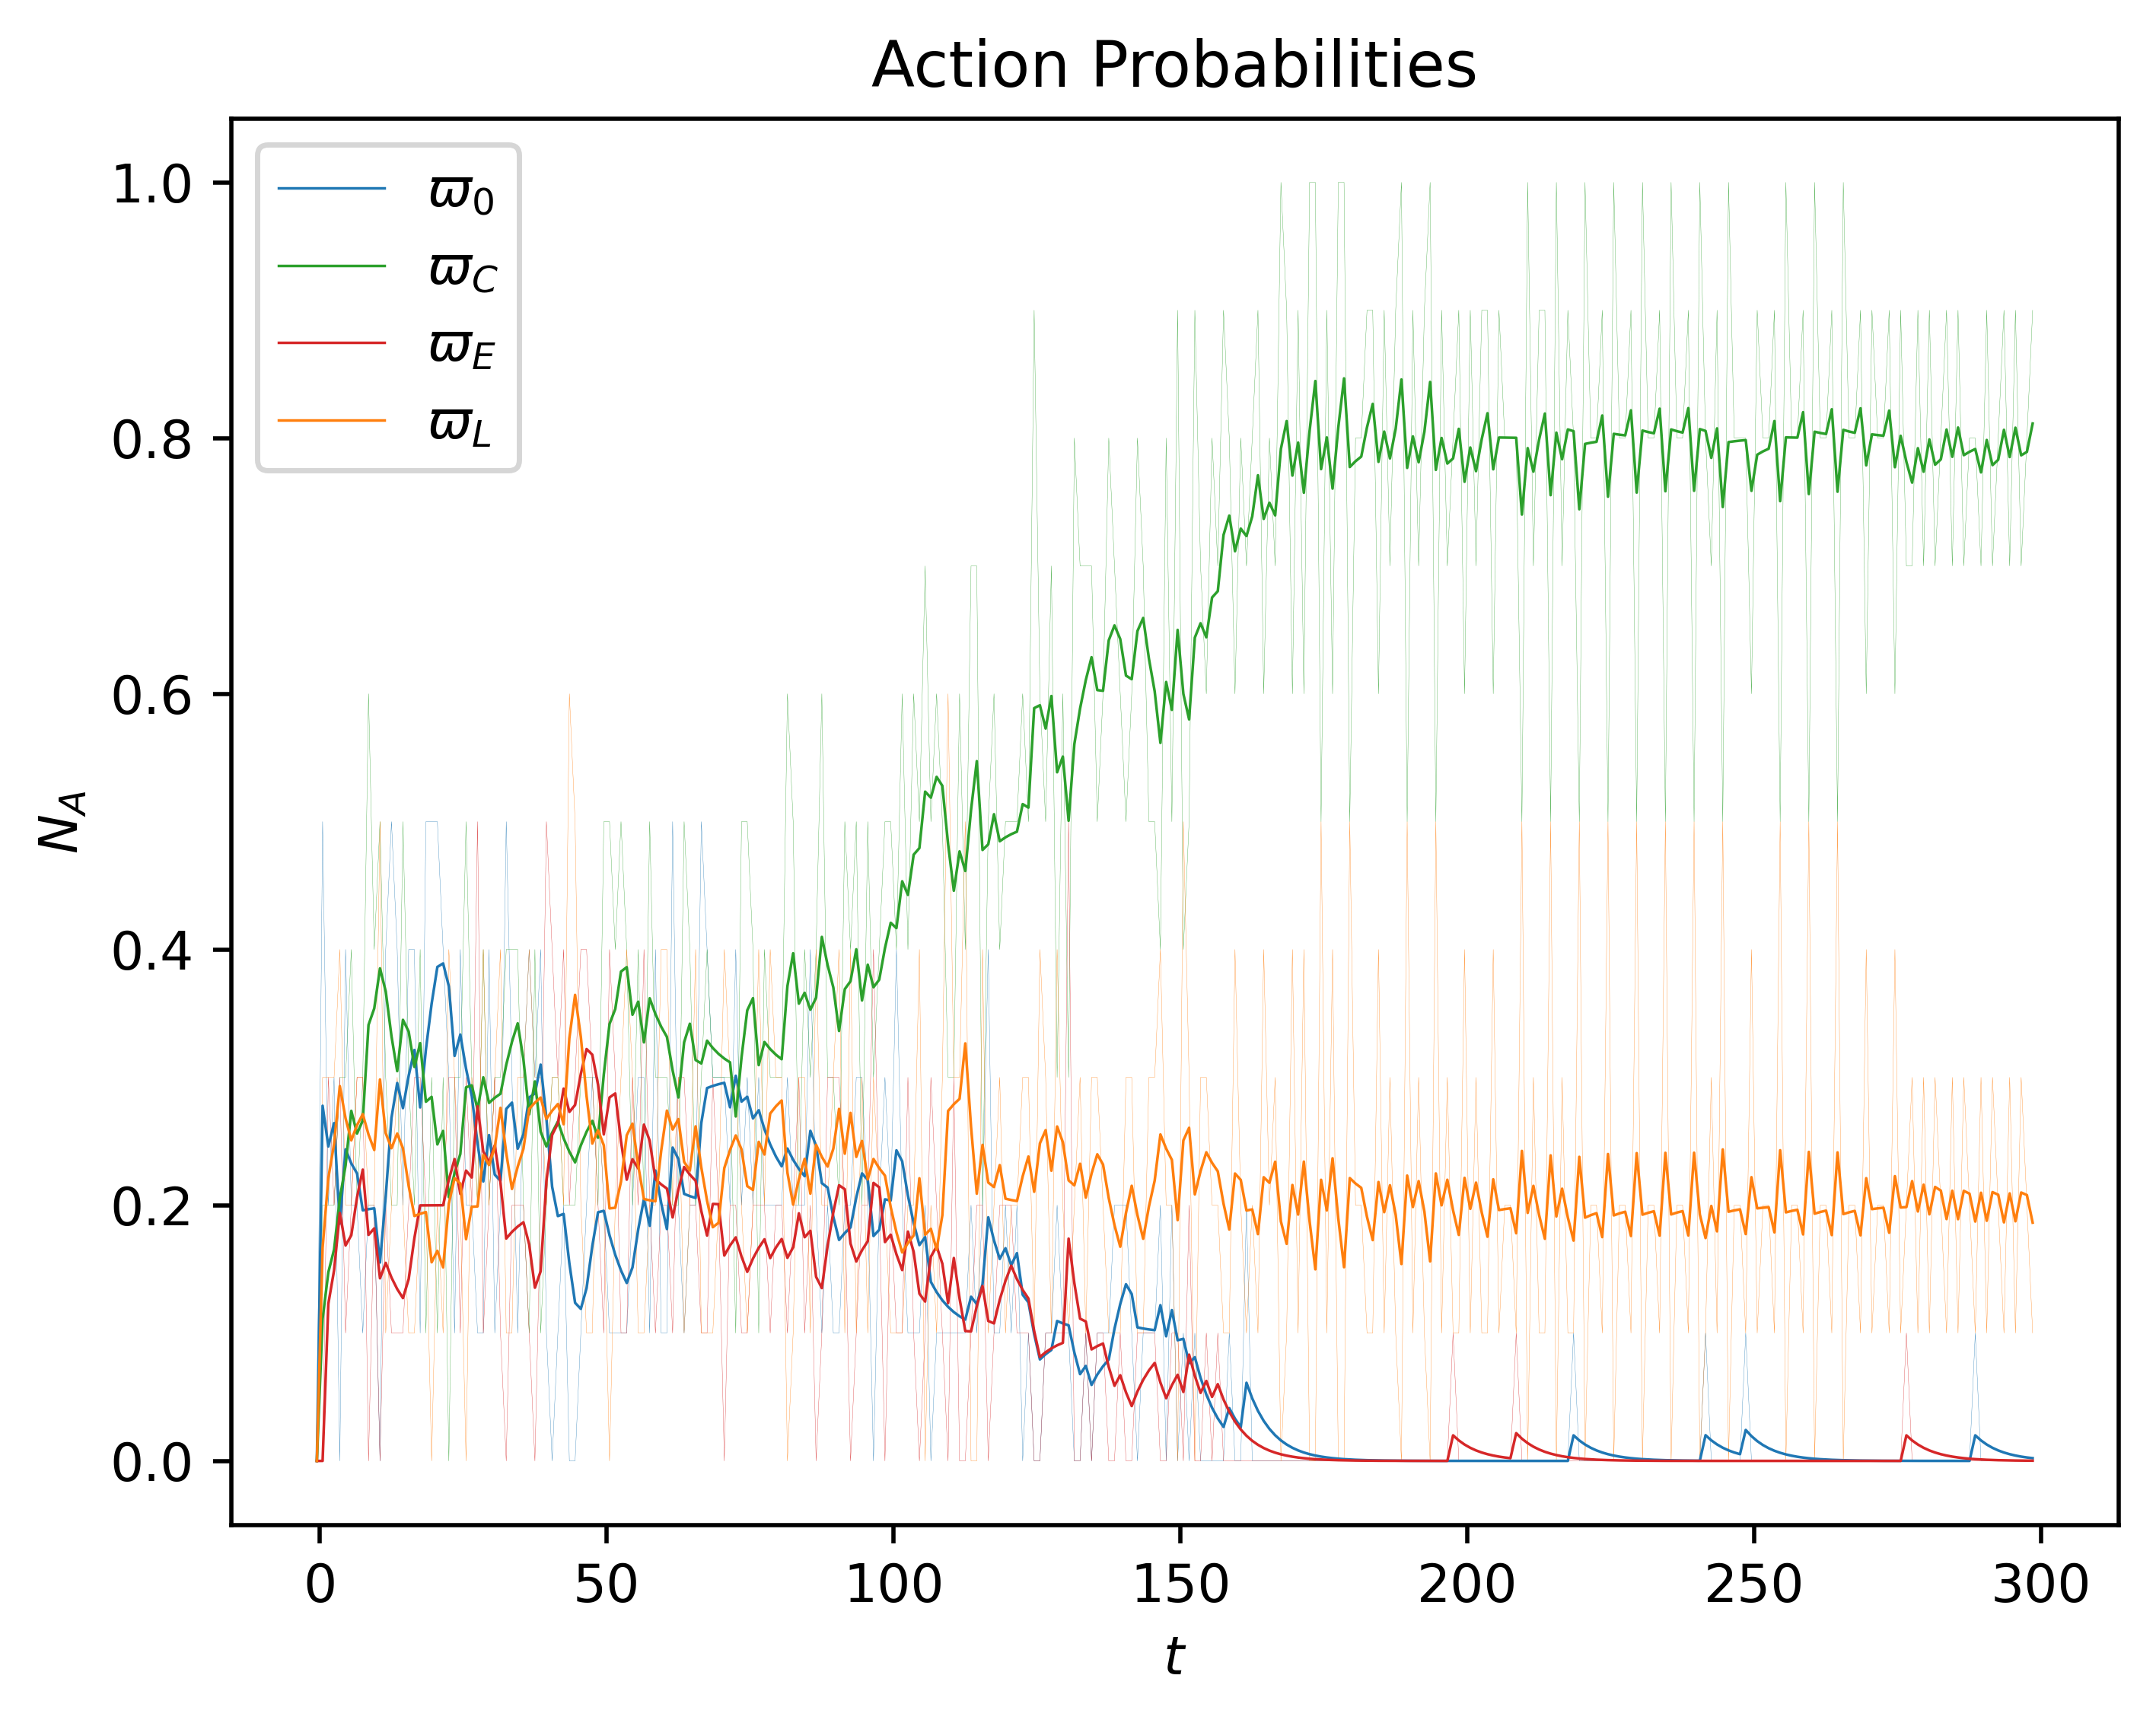

In [11]:
splt.plotA(lw1=0.5, lw2=0.05, ewm=True, alpha=0.2)

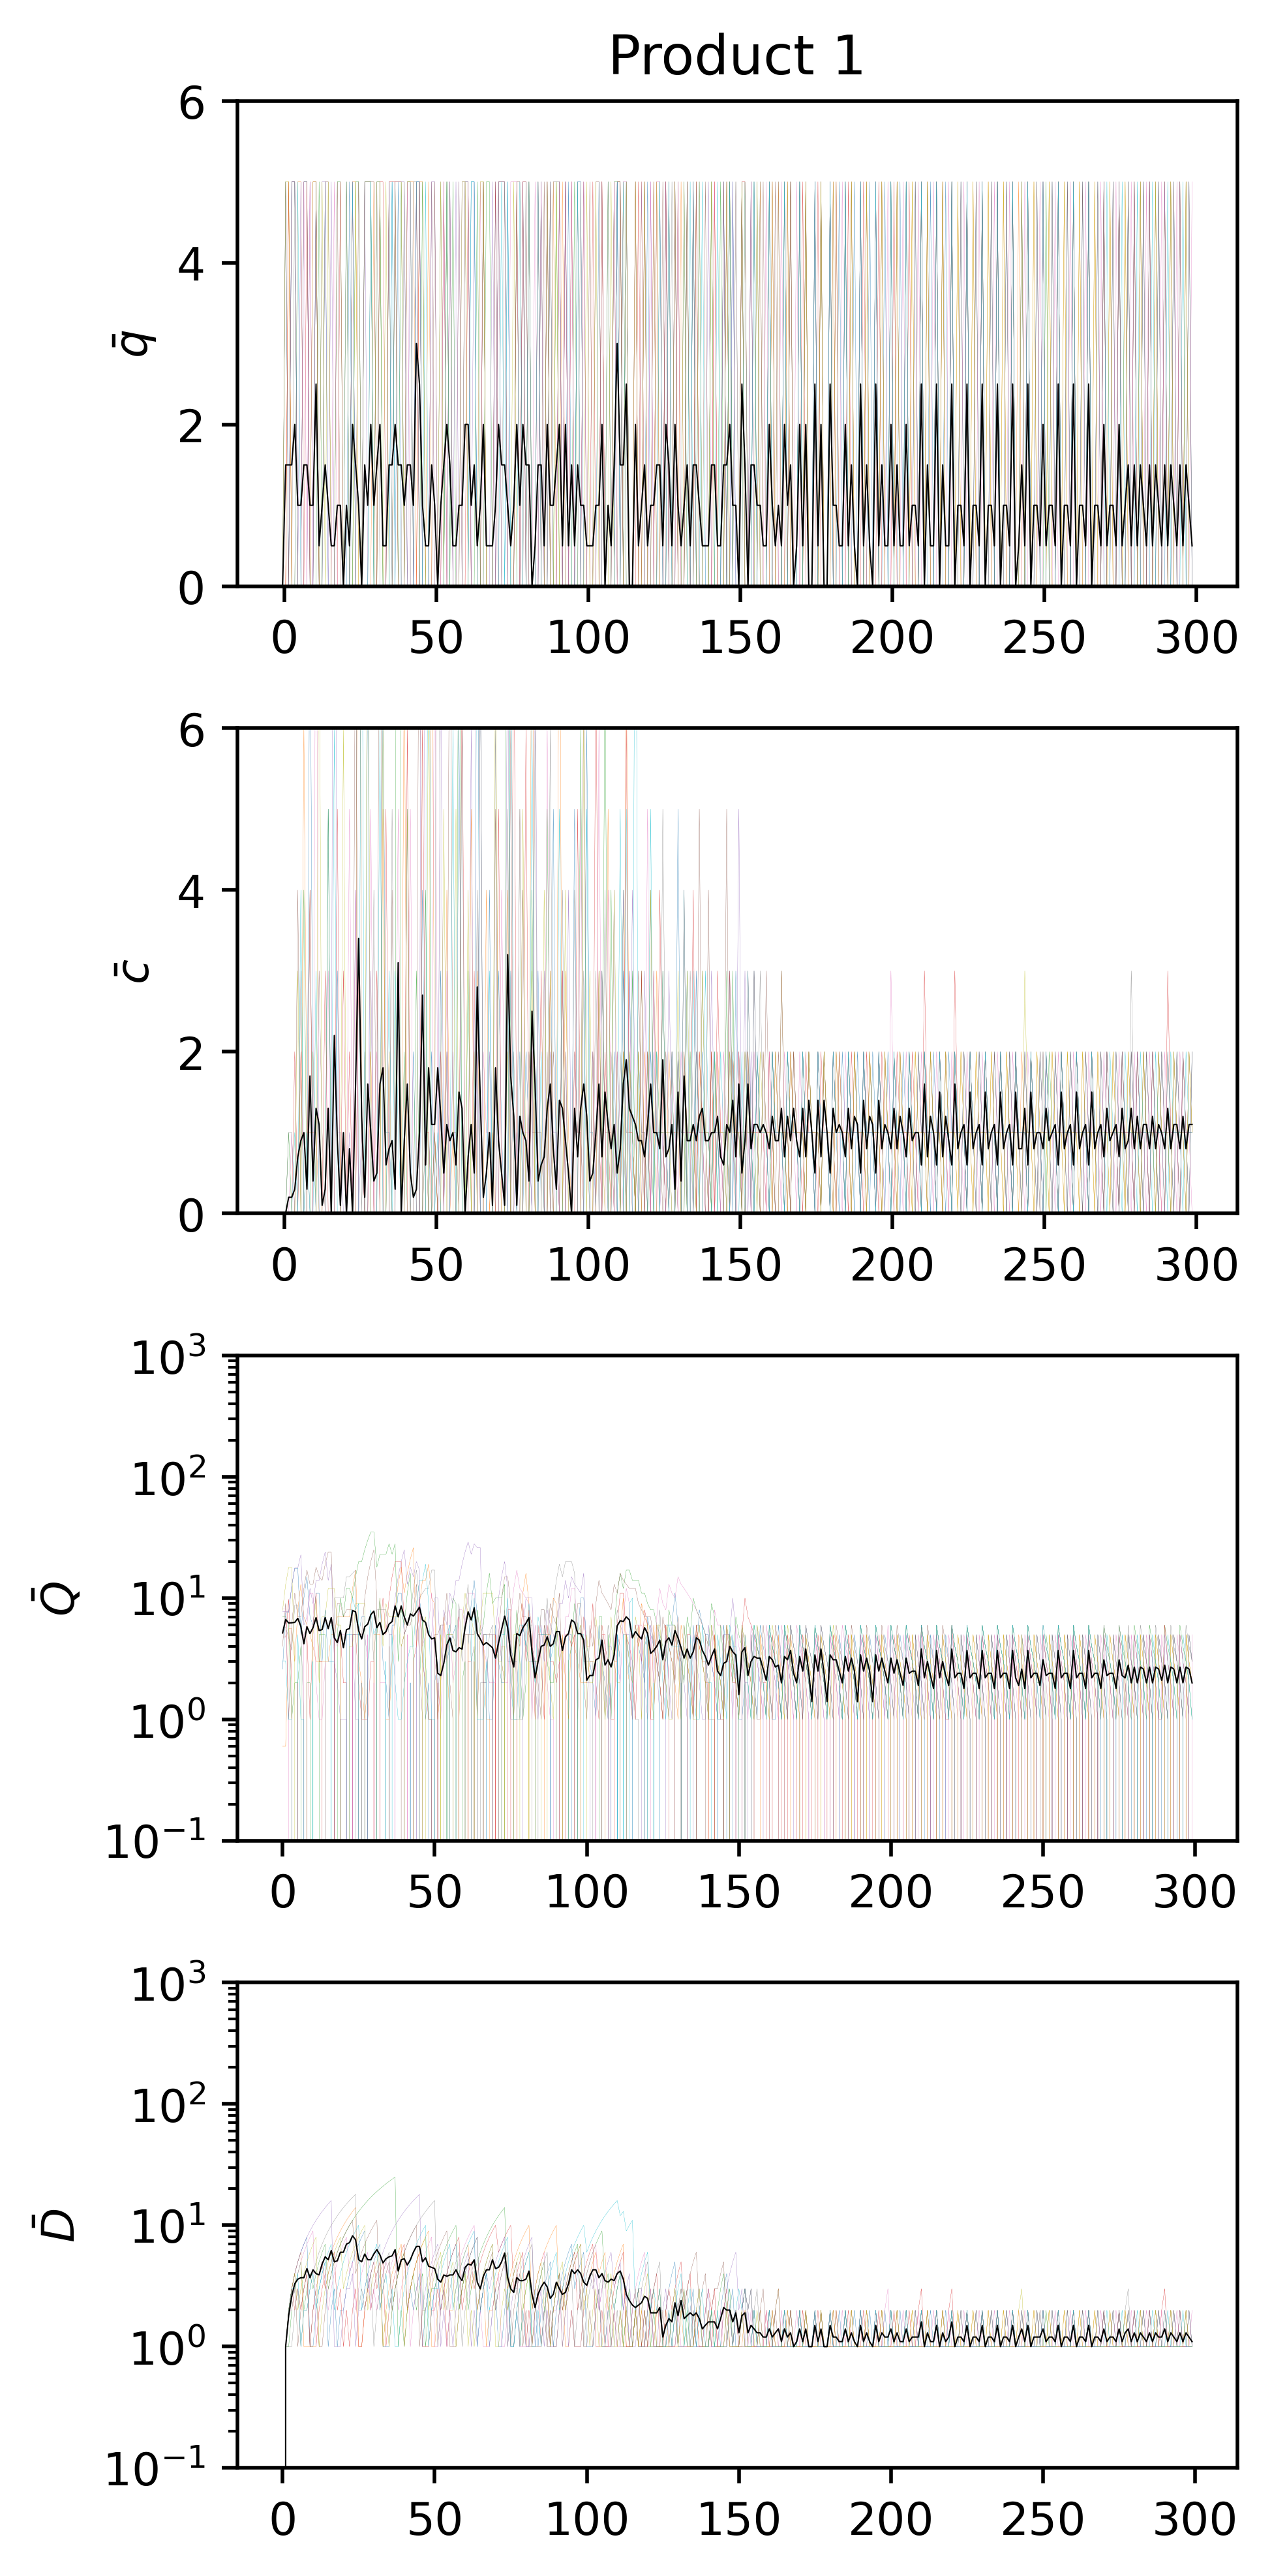

In [12]:
splt.plotQuantities(
    lw1=0.3, 
    lw2=0.05, 
    xmax=10, 
    tight_layout=True, 
    Qlog=True, 
    Dlog=True, 
    qmin=0, 
    qmax=6, 
    cmin=0, 
    cmax=6,
    Qmin = 1e-1,
    Qmax=1e3,
    Dmin=1e-1,
    Dmax=1e3,
)

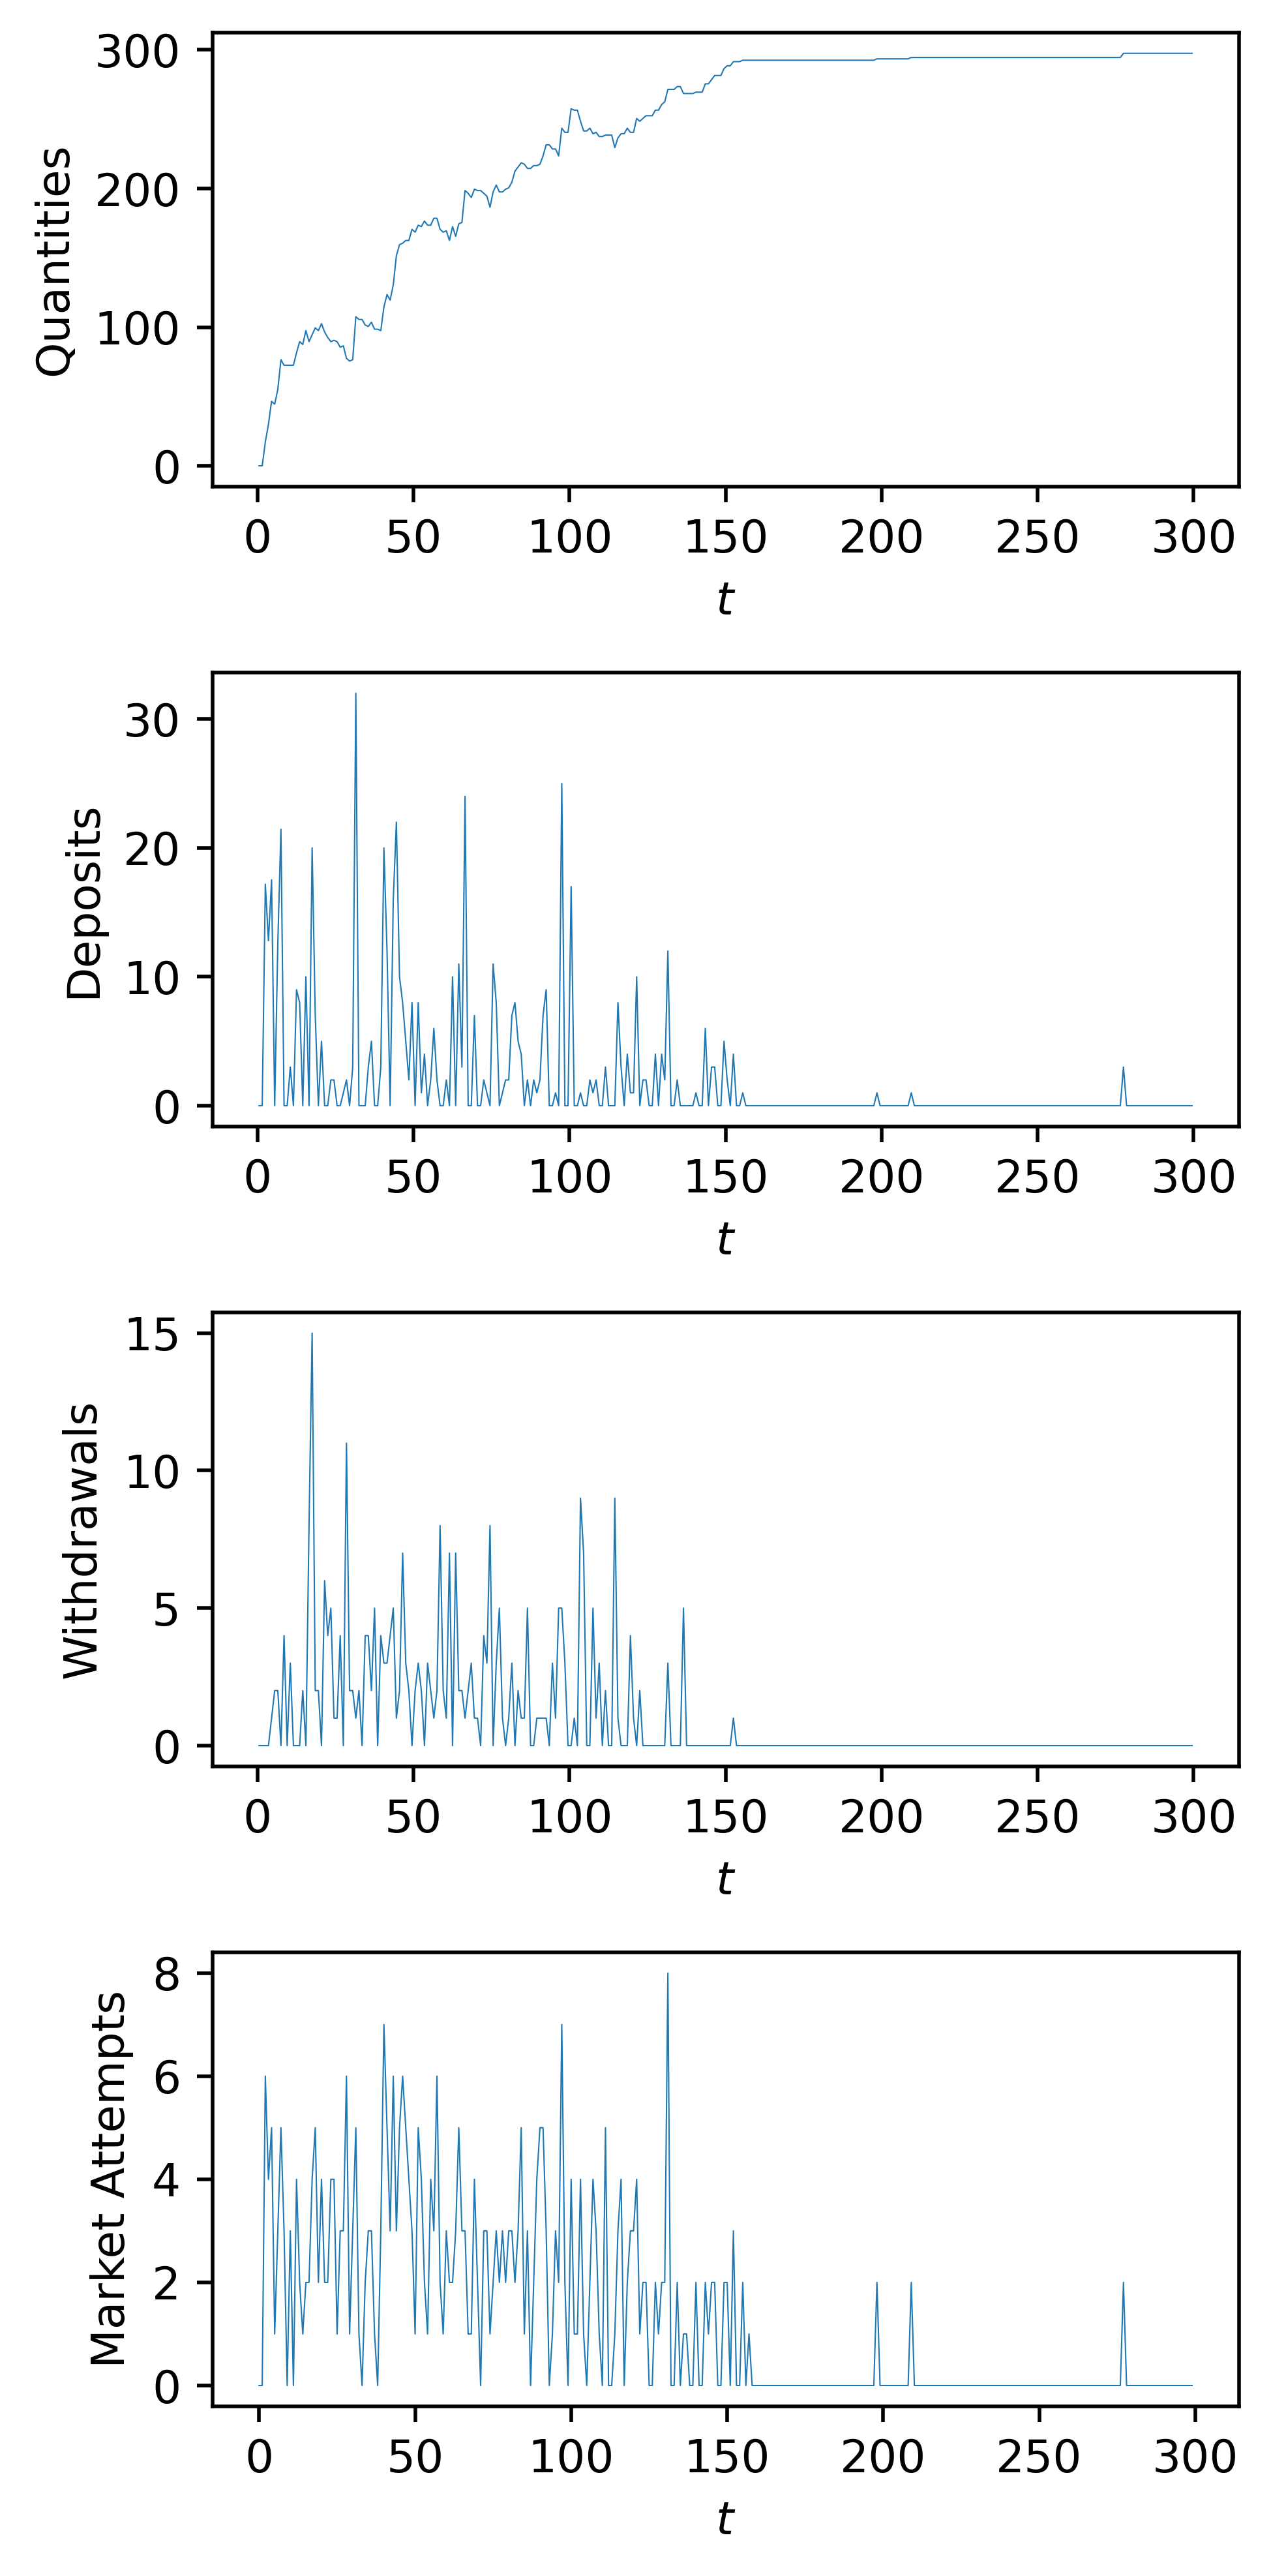

In [13]:
splt.plotProductBank(
    lw1=0.3, 
    lw2=0.05,
    Slog=False,
    Dlog=False,
    Wlog=False,
    Nlog=False,
    tight_layout=True)

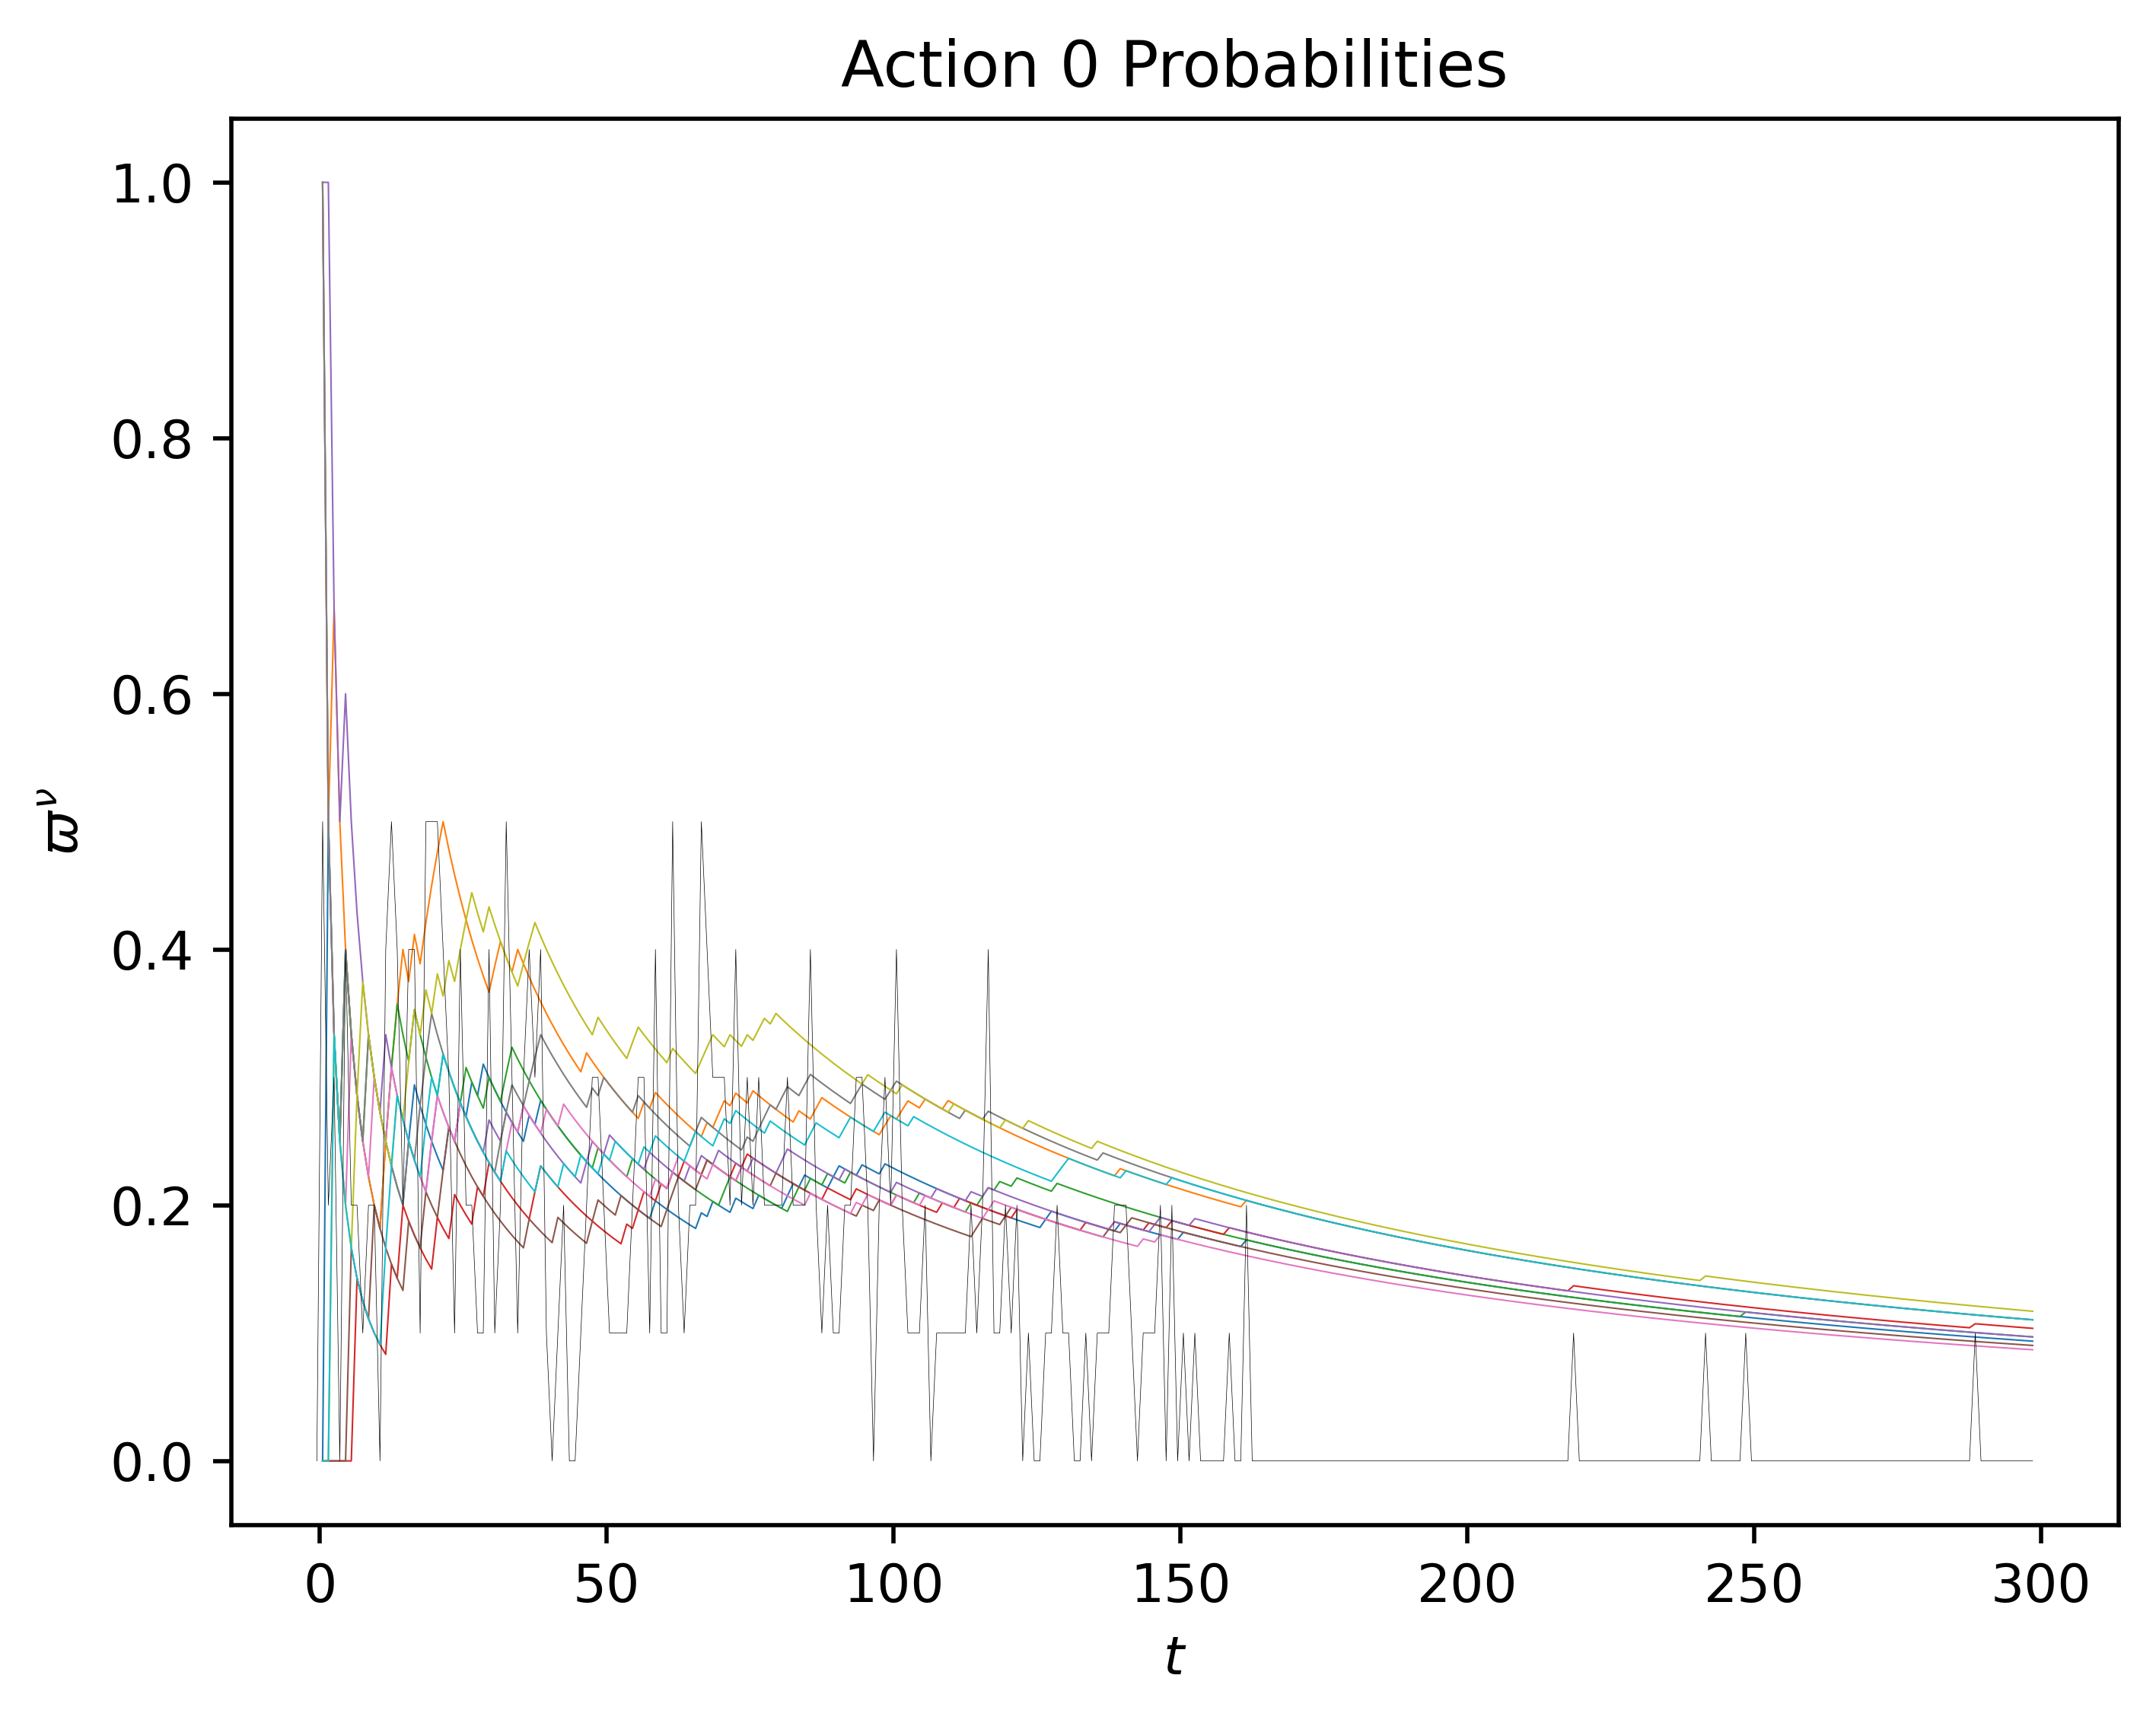

In [14]:
splt.plotPolicy(0)

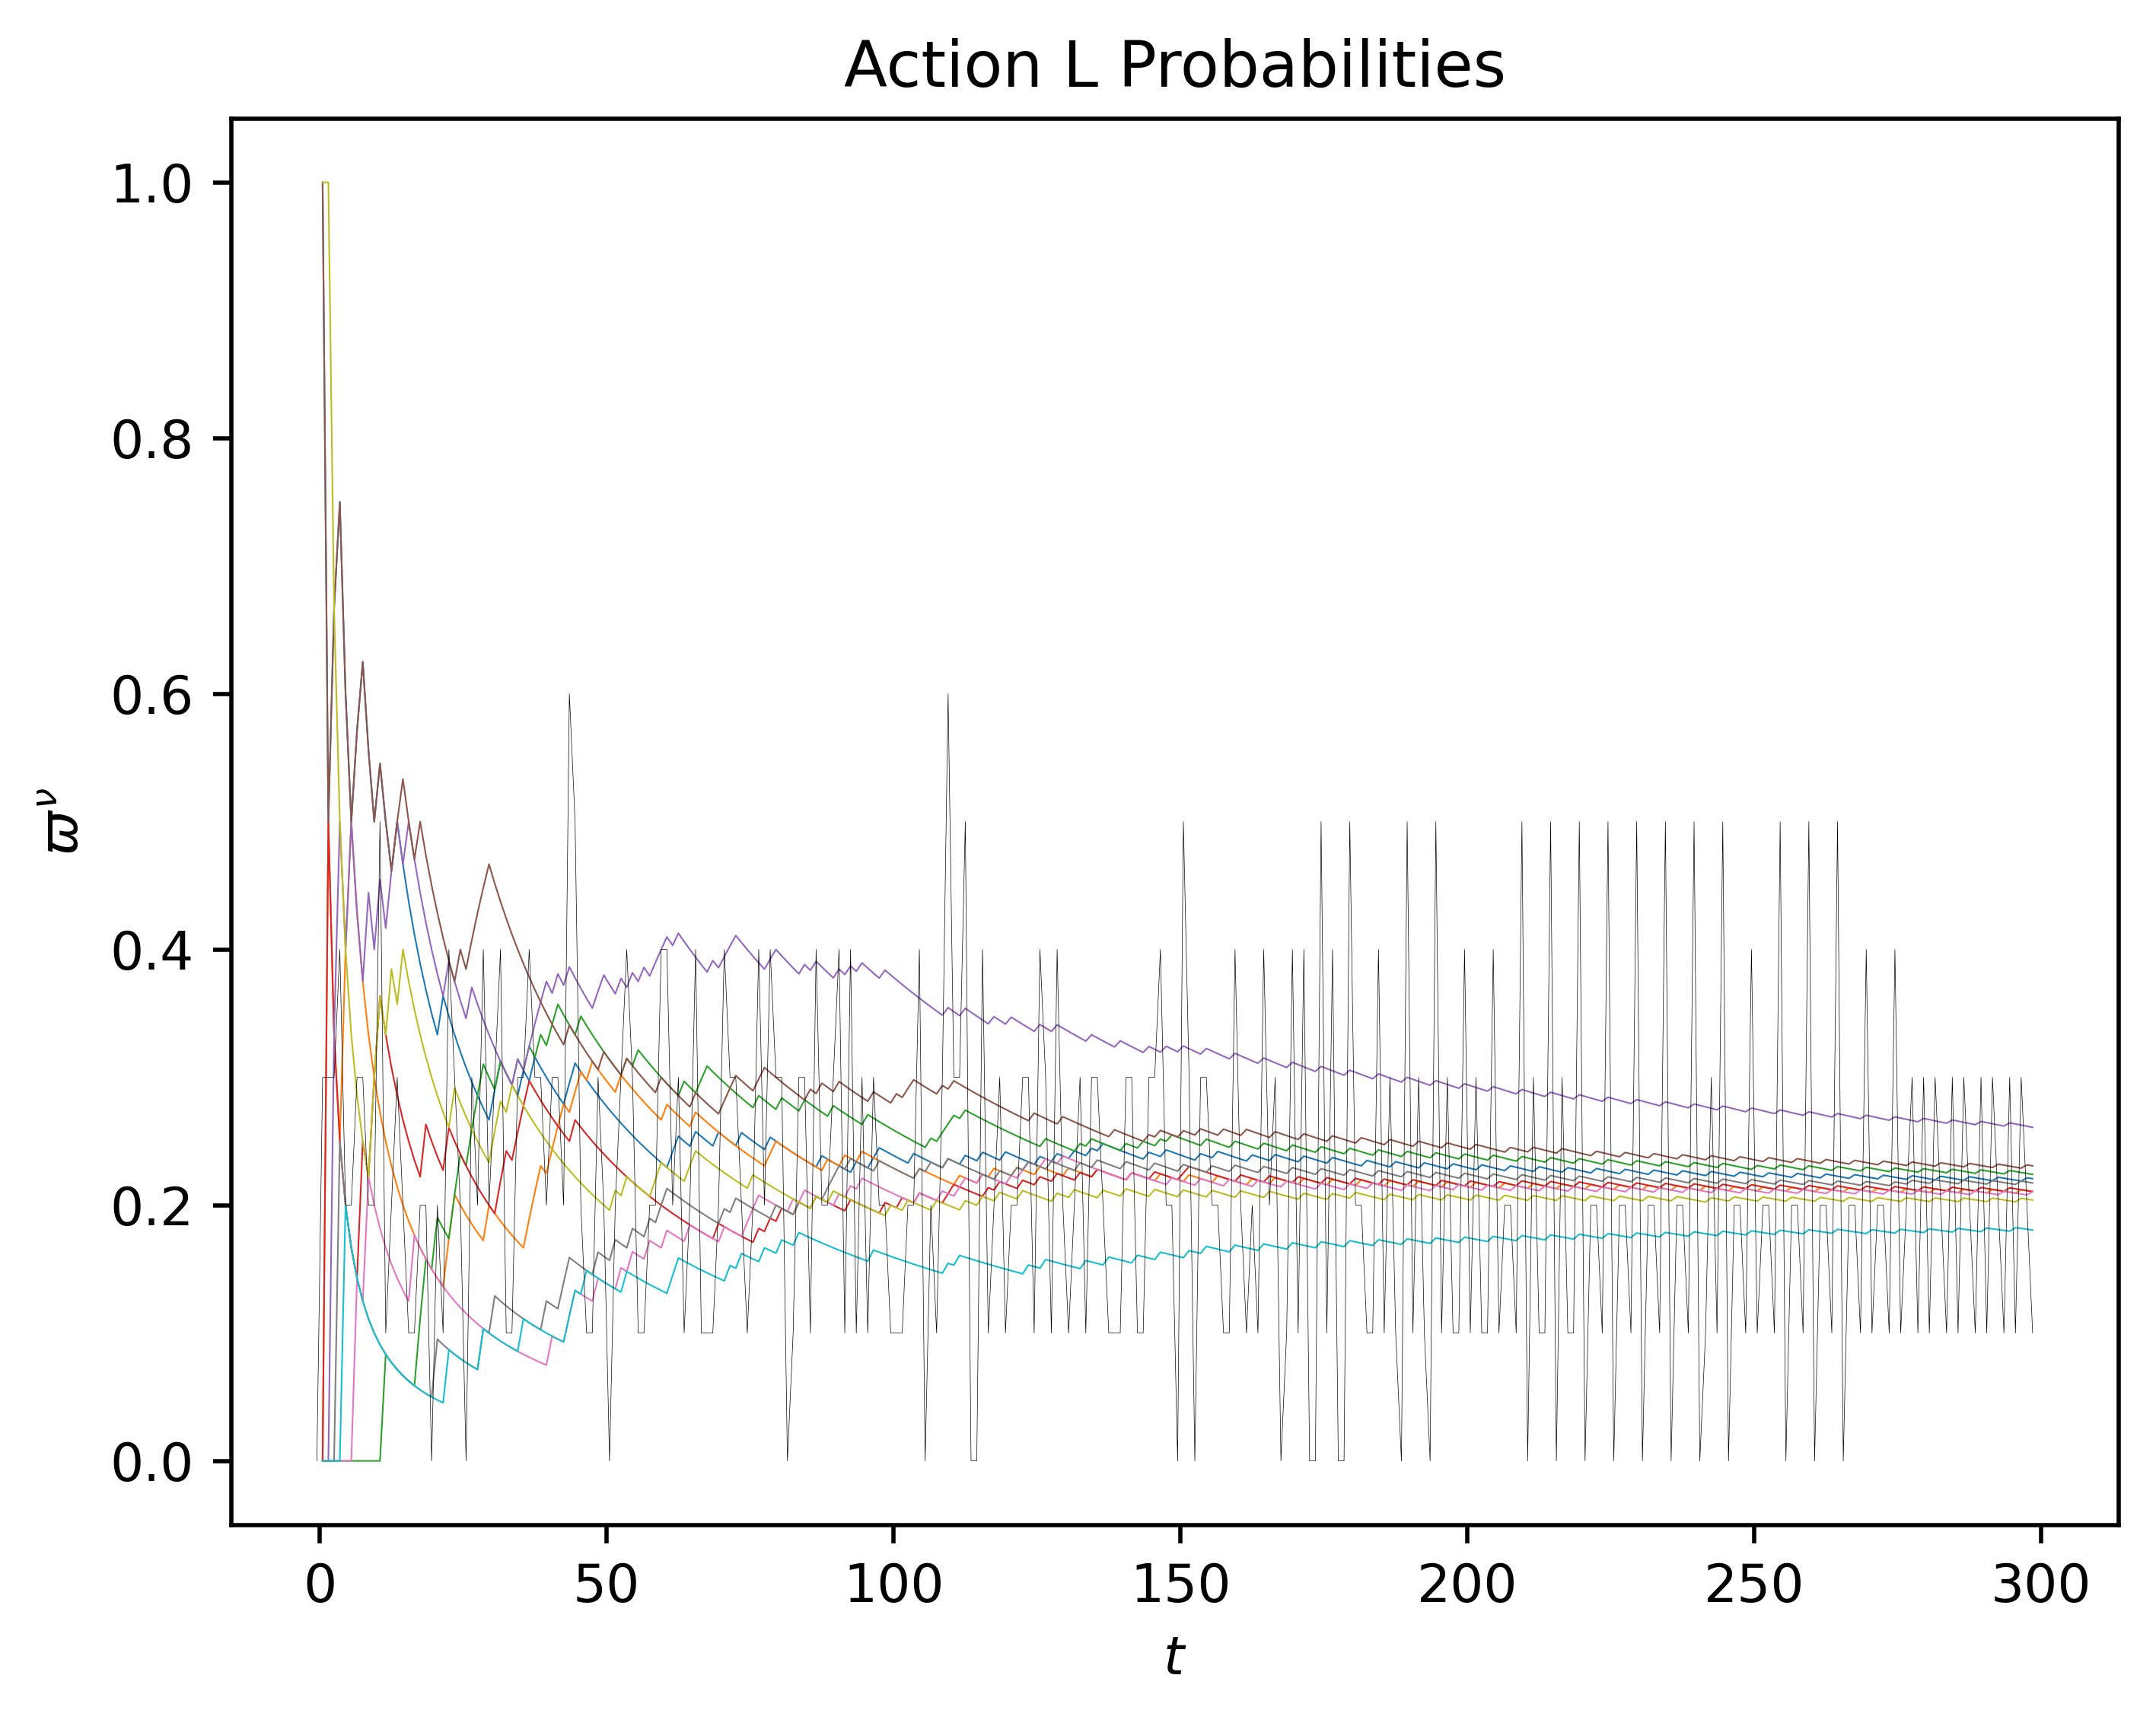

In [15]:
splt.plotPolicy('L')

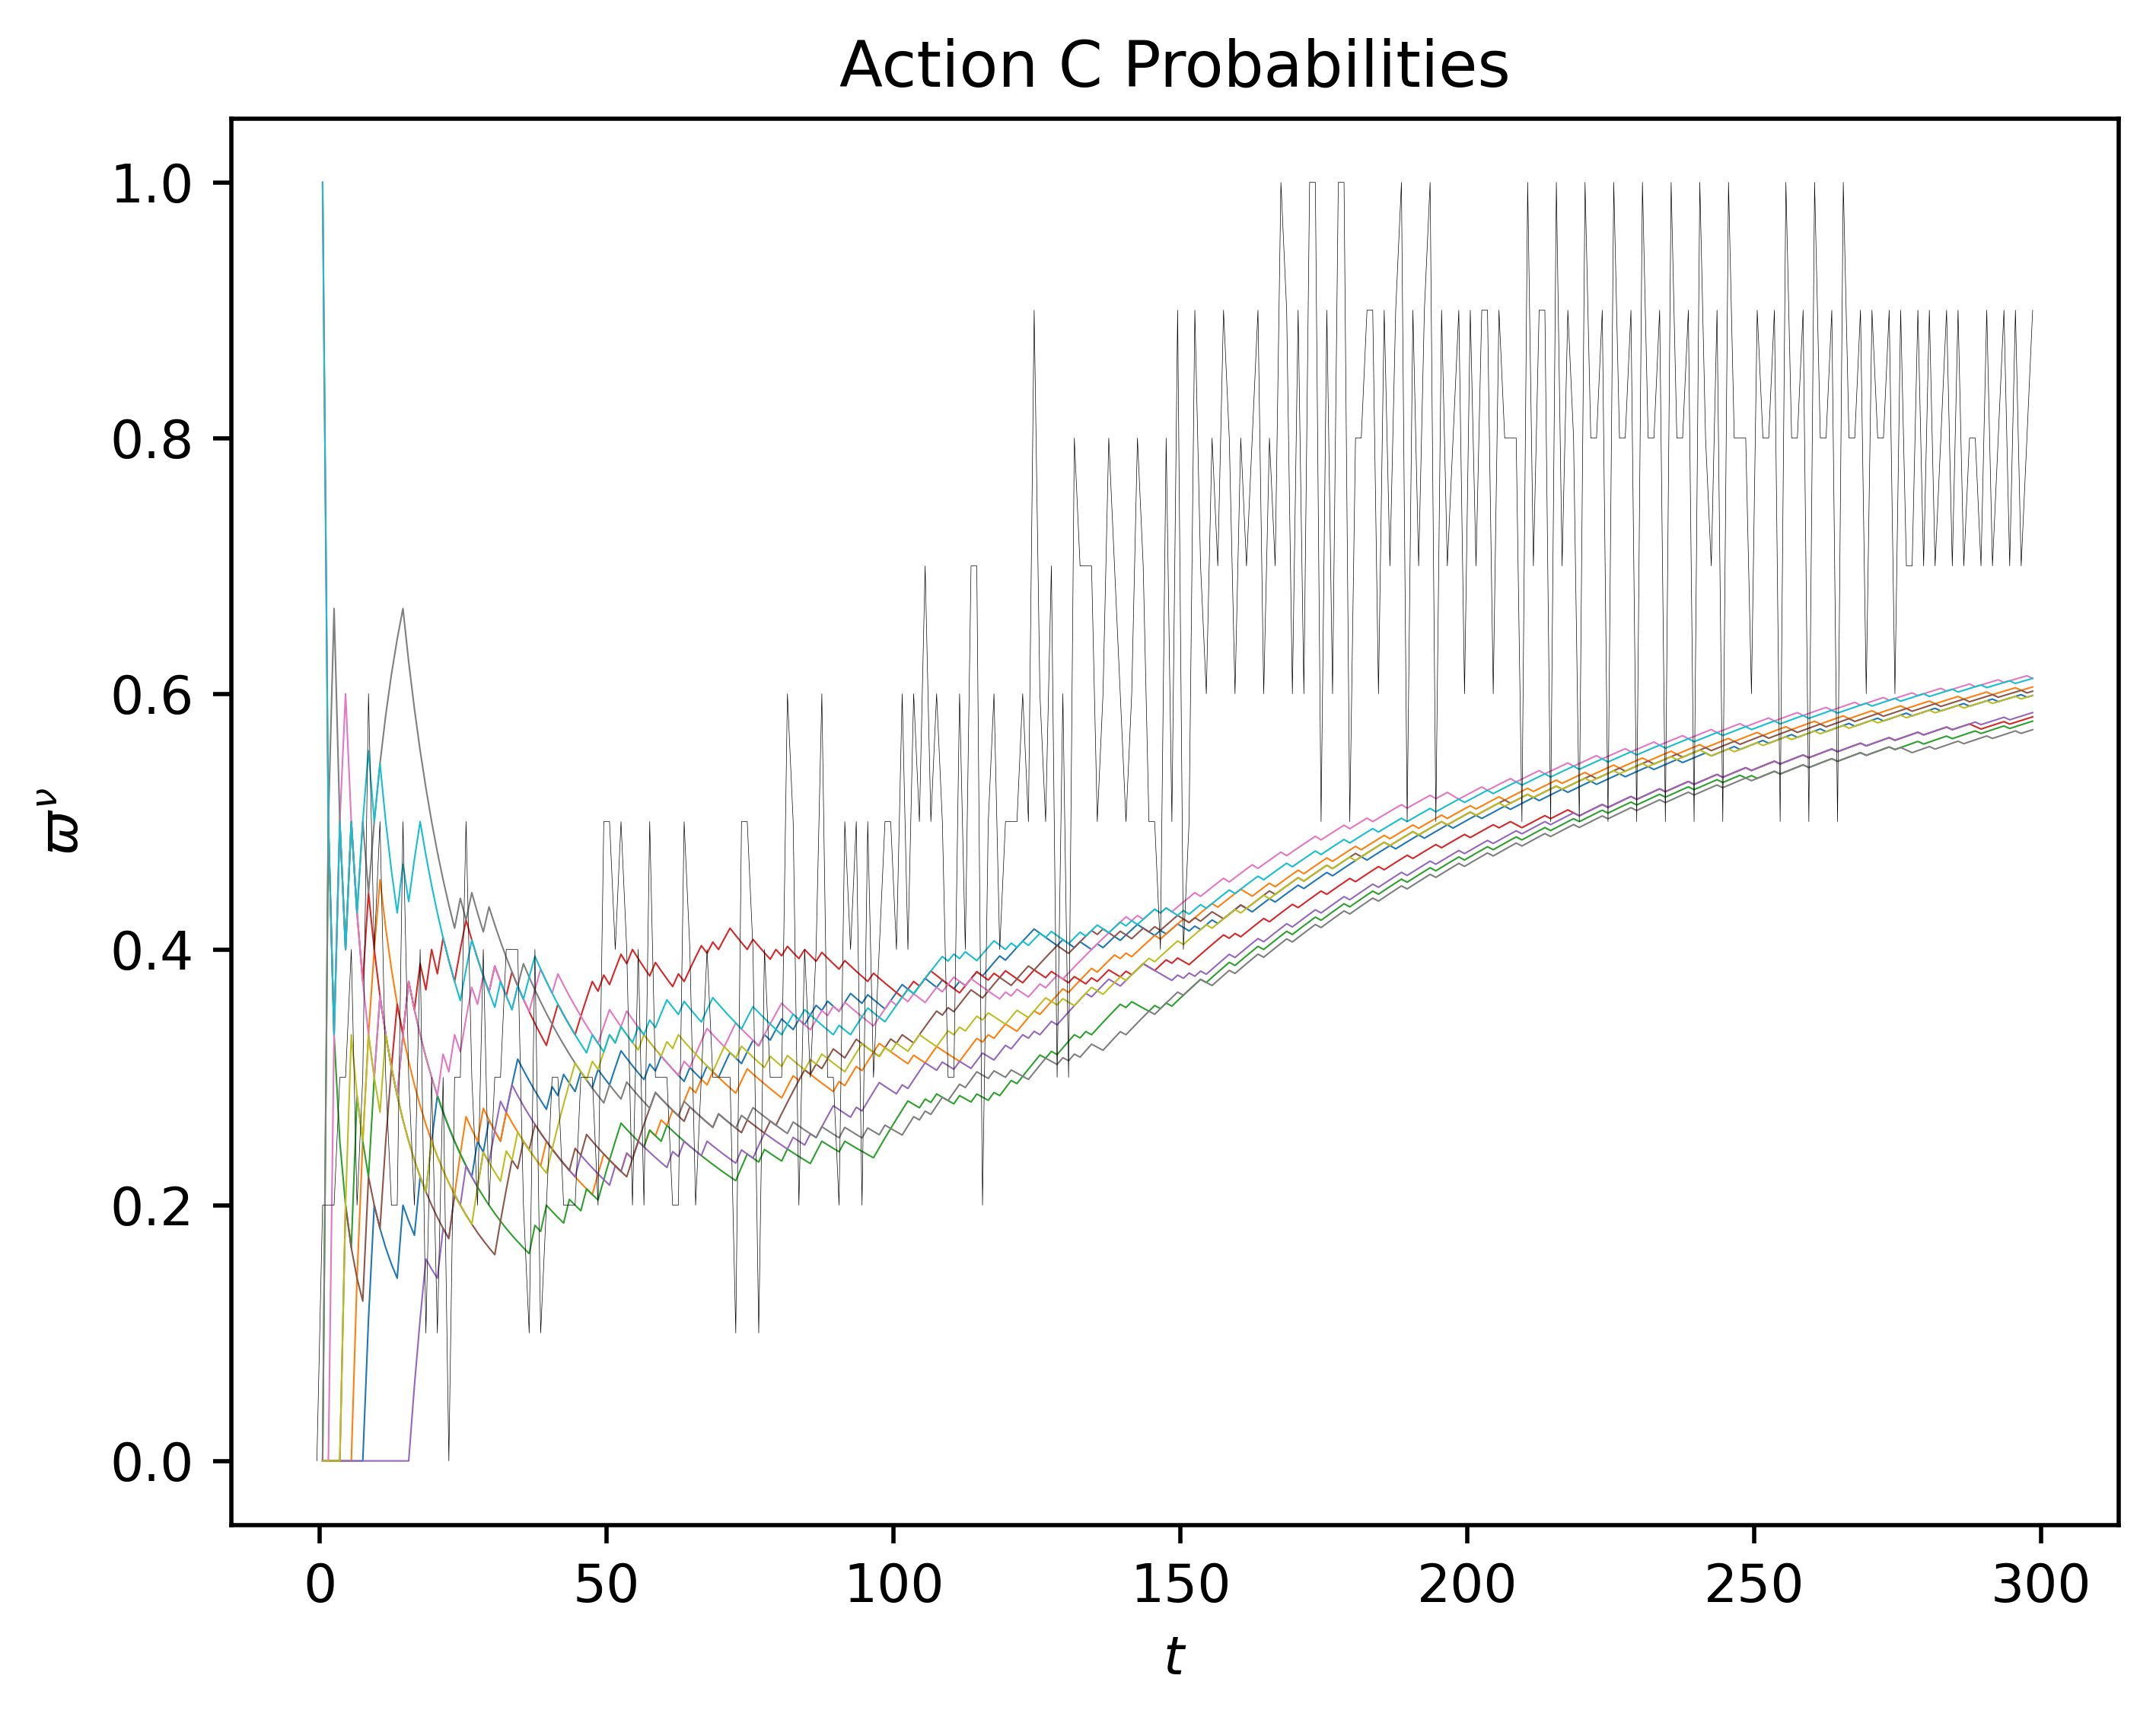

In [16]:
splt.plotPolicy('C')

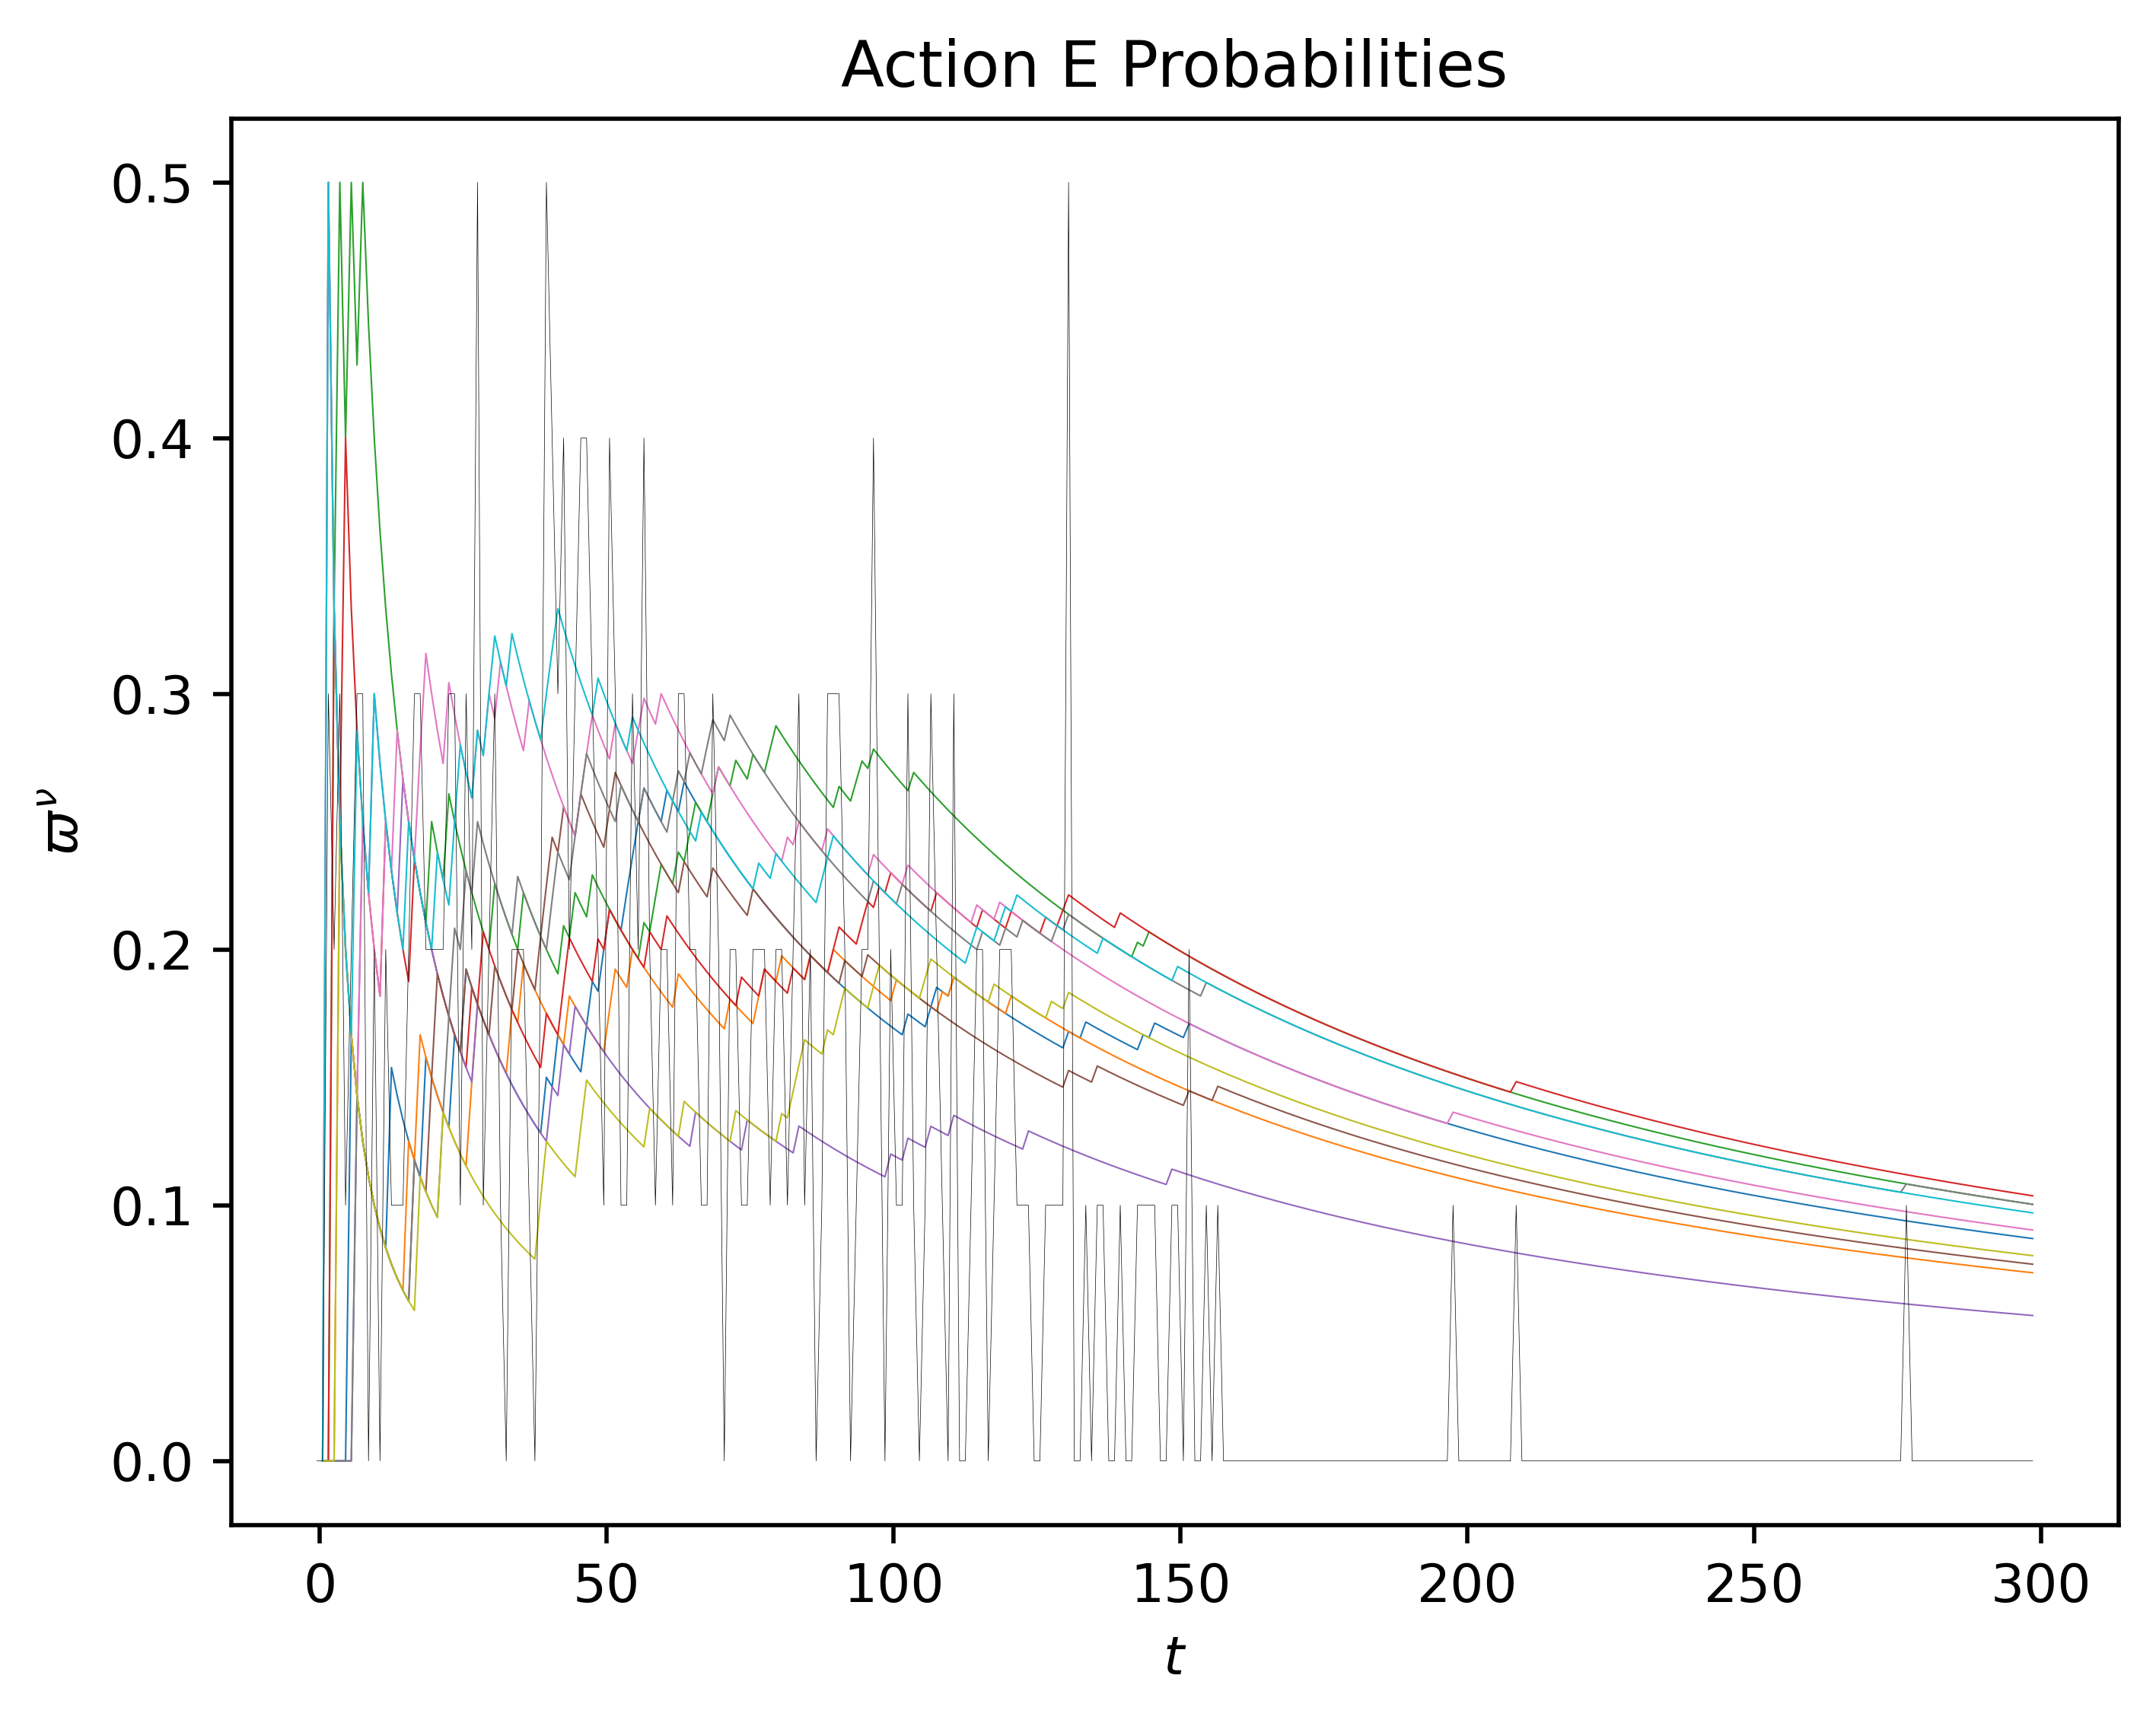

In [17]:
splt.plotPolicy('E')

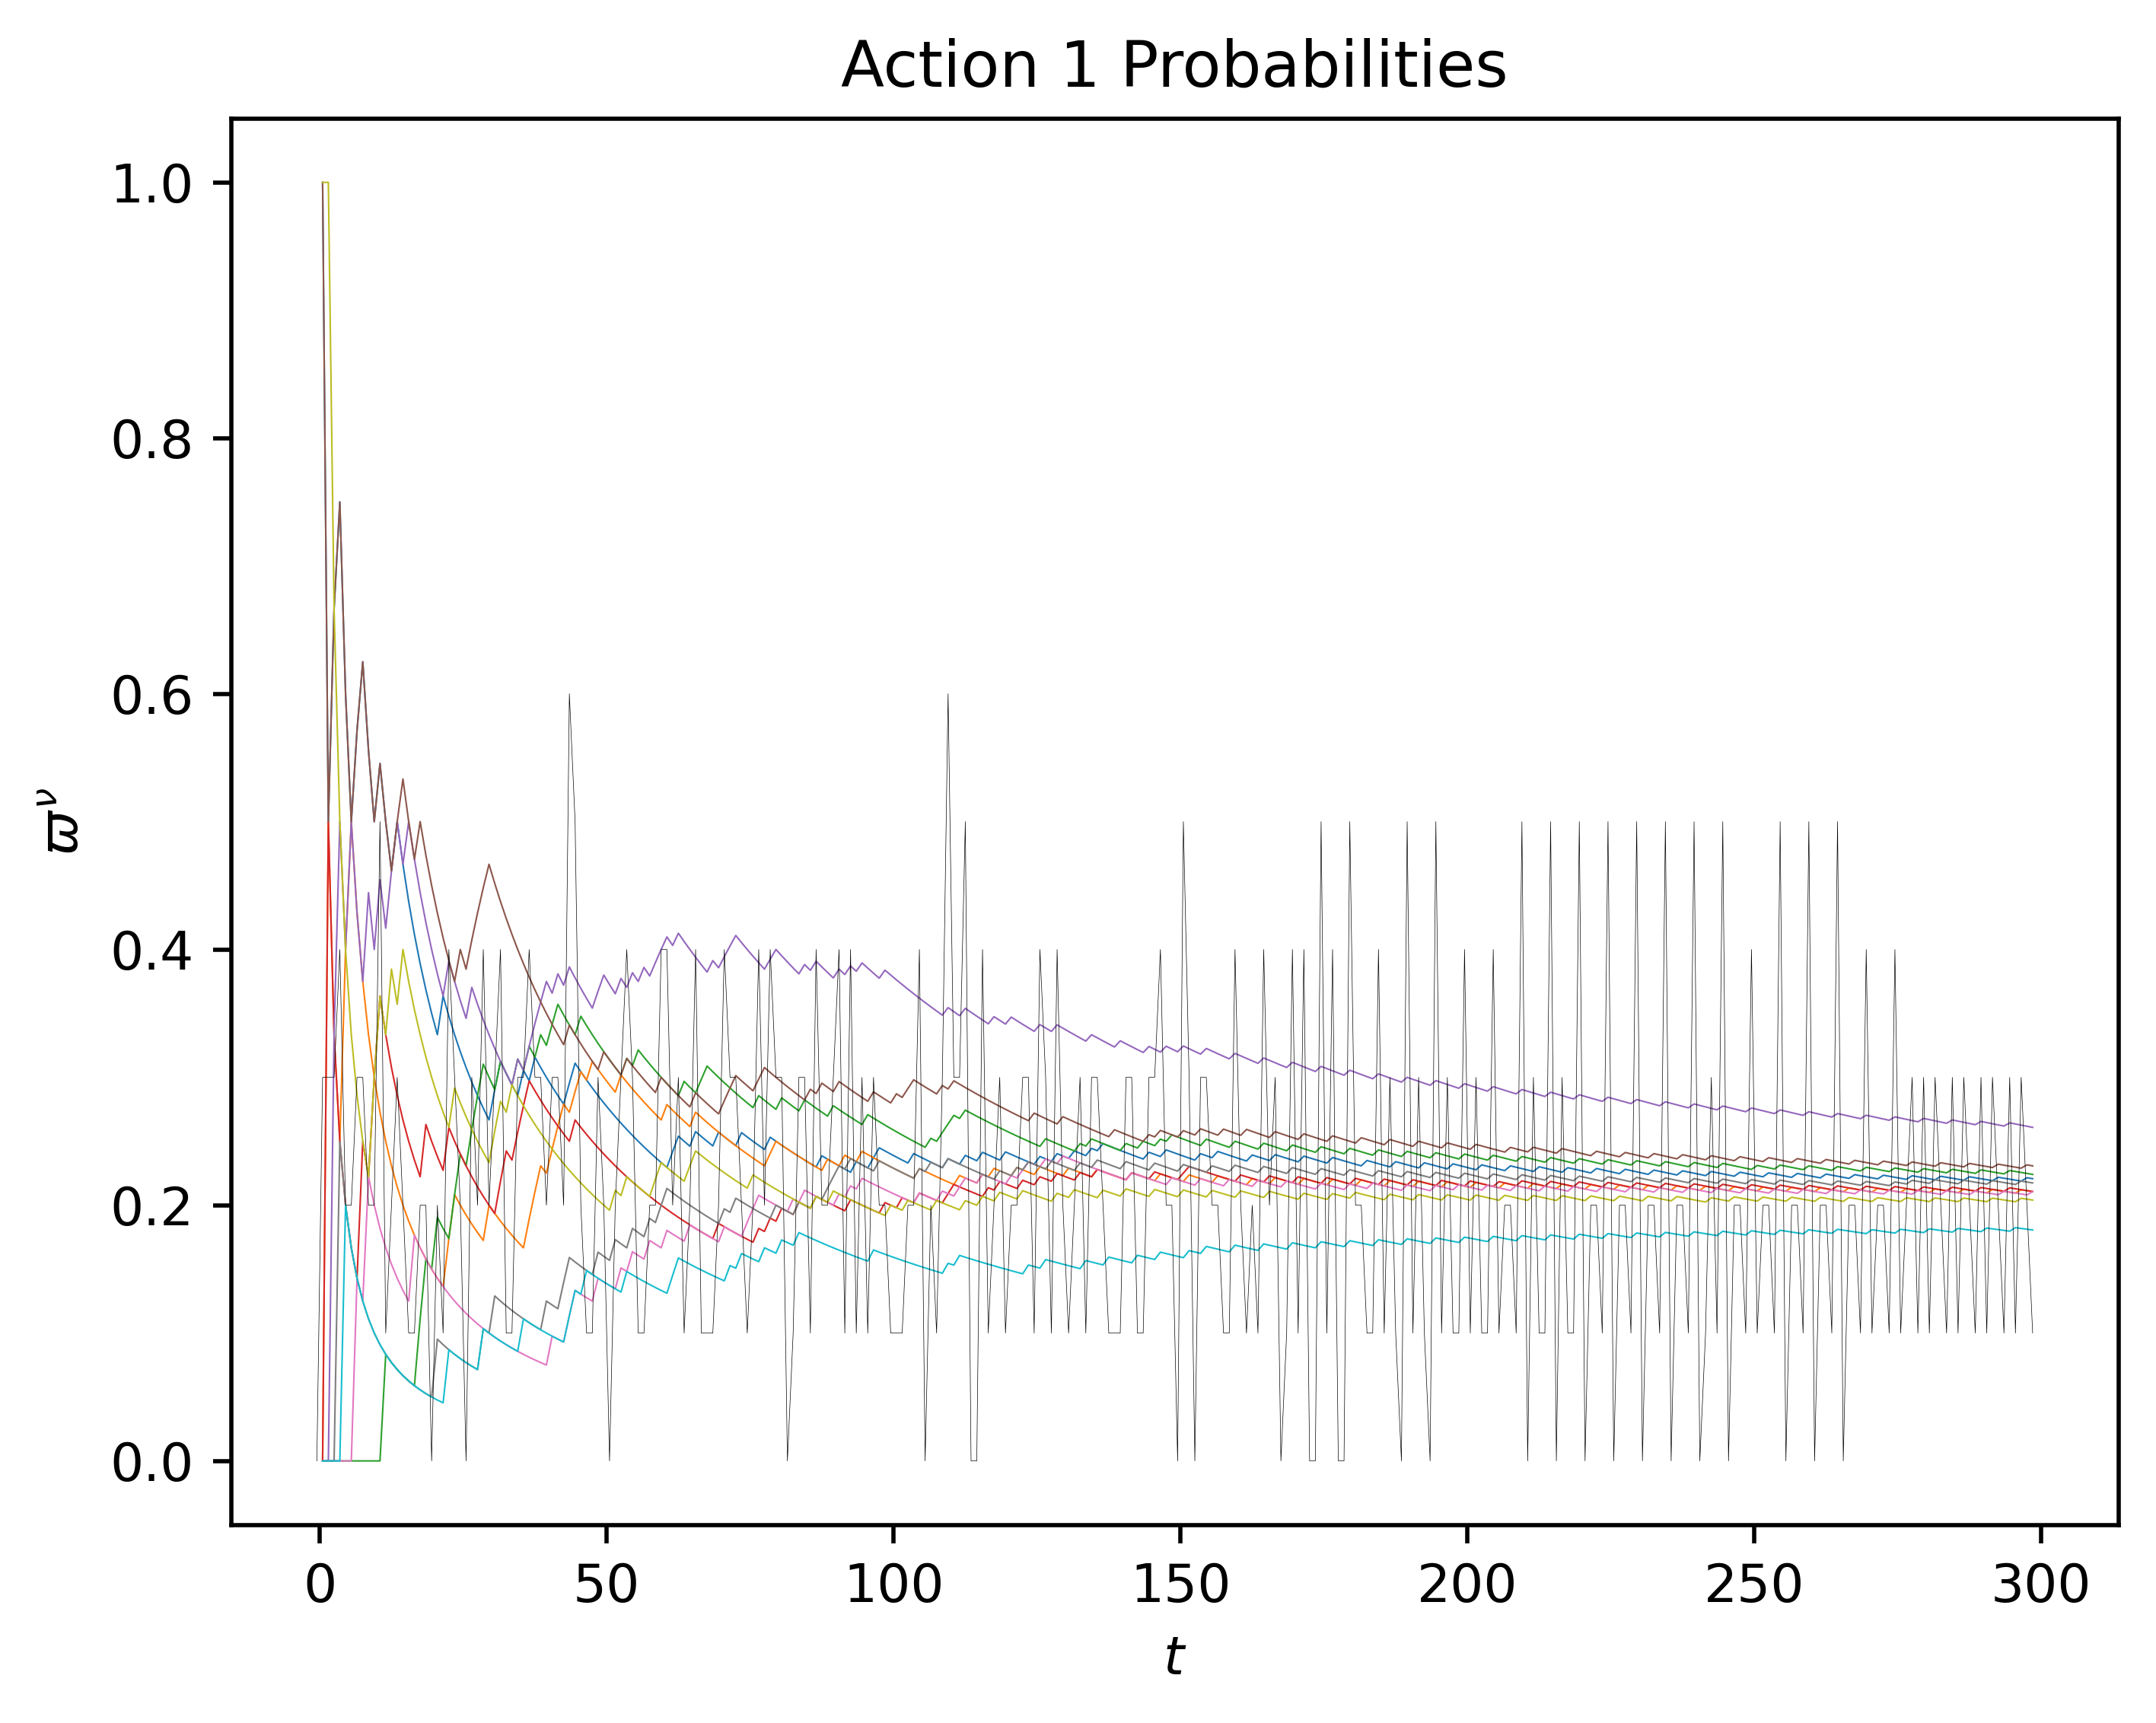

In [18]:
splt.plotPolicy(1)

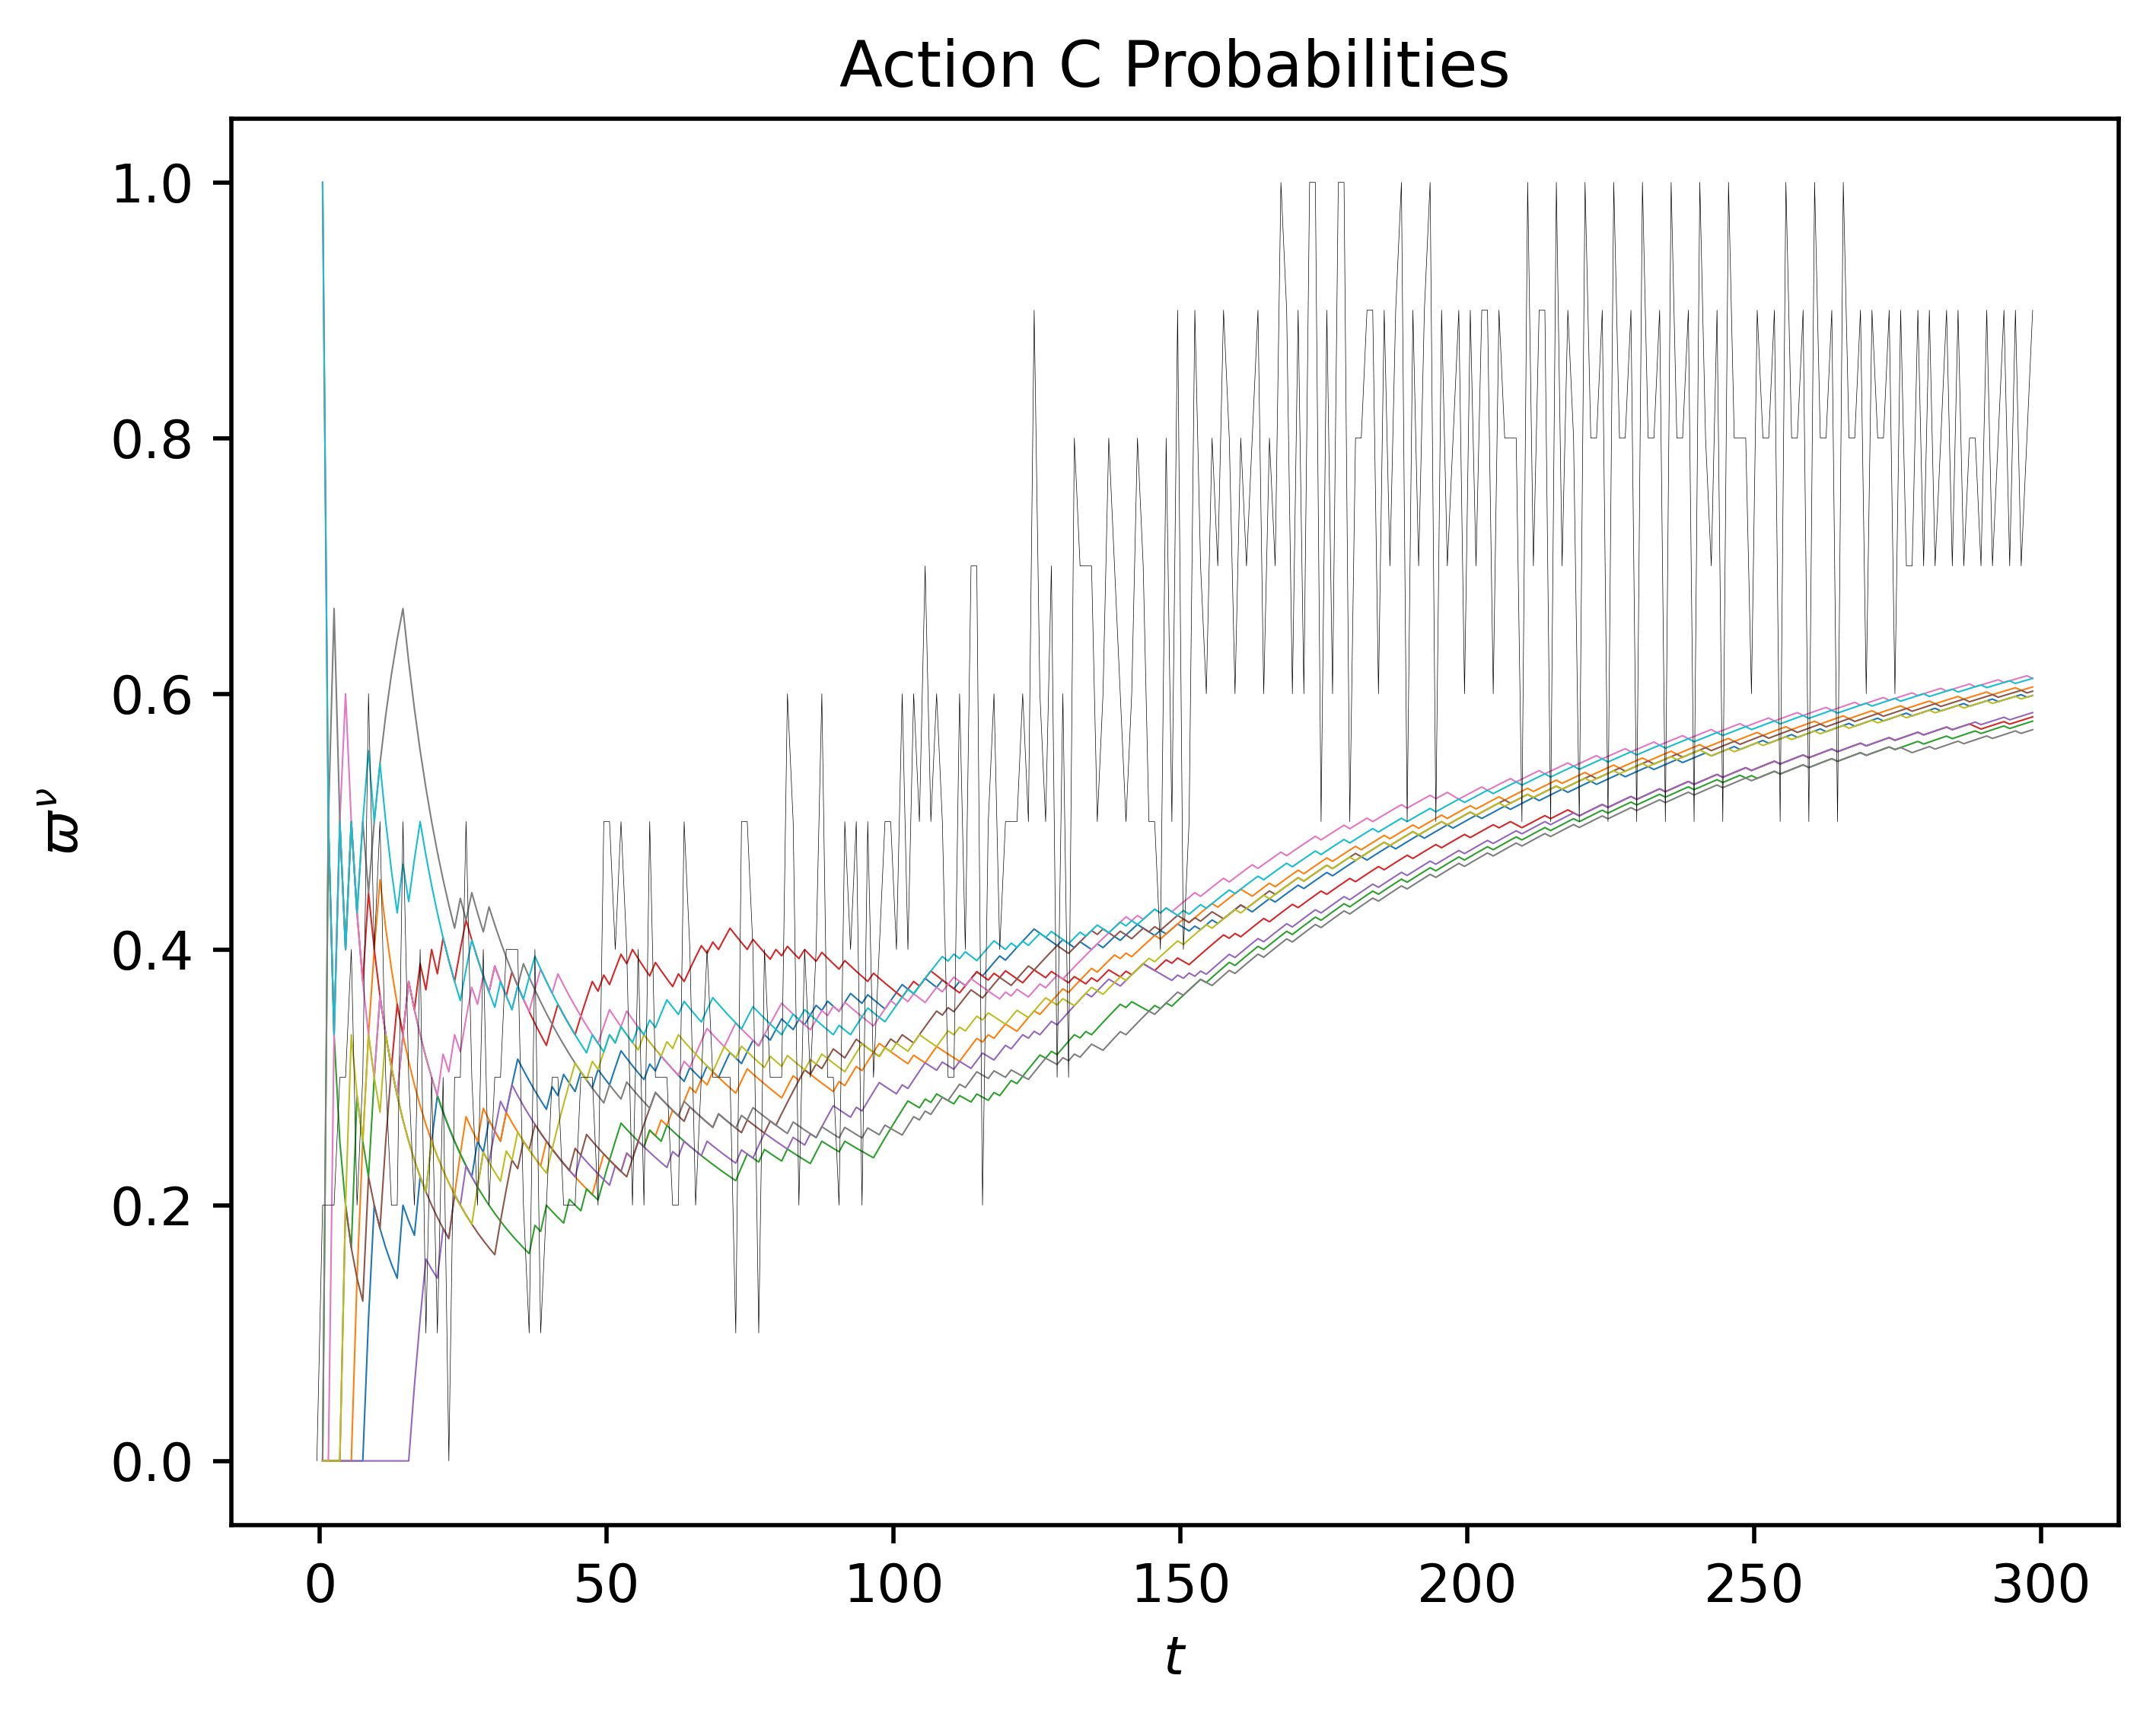

In [19]:
splt.plotPolicy(2)